In [1]:
from accelerator import Lattice
from accelerator.elements import Drift, QuadrupoleThin
from accelerator import Beam
import numpy as np
import matplotlib.pyplot as plt

# transporting phase space coords

In [2]:
d = Drift(1)  # just a drift

In [3]:
lat = Lattice([d])

In [4]:
particle = lat.transport([1, 1, 0, 0, 0])

In [5]:
particle.x

array([1., 2.])

In [6]:
particle.x_prime

array([1., 1.])

In [7]:
particle.y

array([0., 0.])

In [8]:
particle.y_prime

array([0., 0.])

In [9]:
particle.dp

array([0., 0.])

# transporting twiss parameters

In [11]:
twiss = lat.transport([1, 0, 1])

In [12]:
twiss.beta

array([1., 2.])

In [13]:
twiss.alpha

array([ 0., -1.])

In [14]:
twiss.gamma

array([1., 1.])

In [15]:
twiss.s

array([0, 1])

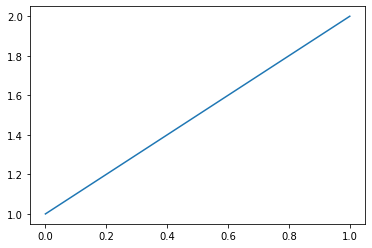

In [16]:
plt.plot(twiss.s, twiss.beta)

# beam phase space ellipse

In [17]:
beam = Beam()

In [19]:
ellipse = beam.ellipse([1,0,1])

In [25]:
ellipse.x.shape

(1000,)

In [29]:
ellipse.x_prime.shape

(1000,)

In [28]:
ellipse.y.shape

(1000,)

In [27]:
ellipse.y_prime.shape

(1000,)

In [26]:
ellipse.dp.shape

(1000,)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='x [m]', ylabel="x'">,
        <AxesSubplot:xlabel='y [m]', ylabel="y'">], dtype=object))

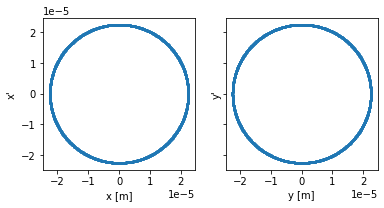

In [30]:
ellipse.plot()

# transporting the ellipse through a drift

In [31]:
ellipses = lat.transport(beam.ellipse([1,0,1]))

In [37]:
ellipses.x.shape

(1000, 2)

In [36]:
ellipses.x_prime.shape

(1000, 2)

In [35]:
ellipses.y.shape

(1000, 2)

In [33]:
ellipses.y_prime.shape

(1000, 2)

In [32]:
ellipses.dp.shape

(1000, 2)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='x [m]', ylabel="x'">,
        <AxesSubplot:xlabel='y [m]', ylabel="y'">], dtype=object))

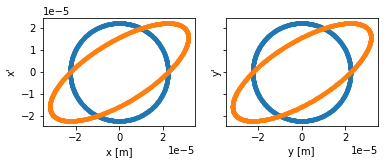

In [38]:
ellipses.plot()

# Now with a fodo cell

In [40]:
beam = Beam()

In [41]:
f = 0.8  # focal length (m)
L = 1.  # drift length (m). Note FODO total length: 2L

half_quad_F = QuadrupoleThin(2.*f)
quad_D = QuadrupoleThin(-f)
drift = Drift(L)

In [42]:
FODO = Lattice([half_quad_F, drift, quad_D, drift, half_quad_F])

In [44]:
ellipse = beam.ellipse(FODO.solve_twiss())

In [45]:
ellipses = FODO.transport(ellipse)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='x [m]', ylabel="x'">,
        <AxesSubplot:xlabel='y [m]', ylabel="y'">], dtype=object))

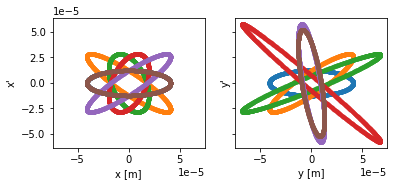

In [46]:
ellipses.plot()

# slicing drift to get better beta curves

In [47]:
twiss = FODO.slice(Drift, 20).twiss()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

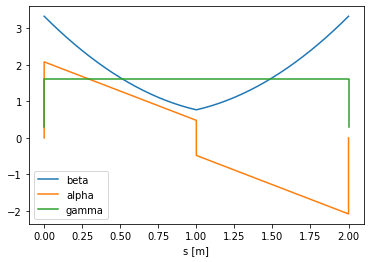

In [48]:
twiss.plot()

# vizualize particle trajectories through 8 fodo cells

In [50]:
particles = (FODO*8).transport(Beam(n_particles=10).match(FODO.solve_twiss()))

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='x [m]', ylabel="x'">,
        <AxesSubplot:xlabel='y [m]', ylabel="y'">], dtype=object))

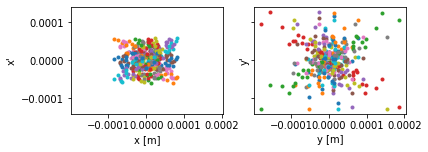

In [51]:
particles.plot()

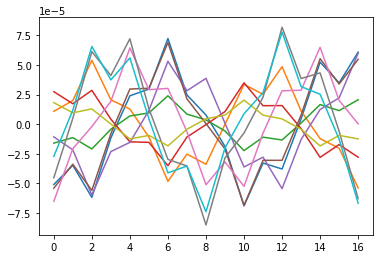

In [53]:
plt.plot(particles.s, particles.x.T)